In [111]:
# Import libraries and packages.

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import FuncFormatter

from matplotlib.colors import ListedColormap

from sklearn.preprocessing import StandardScaler, label_binarize, LabelEncoder

# About Financial Fraud Dataset

In this Tlab project, we'll be exploring Financial fraud dataset to identify patterns and detect fraudulent transactions. Below is a  detailed  overview of variables within this dataset

* Step: A unit of time that represents hours in the dataset. Think of this as the timestamp of the transaction (e.g. hour 1, hour 2, … hour 534, …) 

* Type: The type of transaction 

* Amount: The amount of money transferred 

* NameOrig: The origin account name

* OldBalanceOrg: The origin accounts balance before the transaction 

* NewBalanceOrg: The origin accounts balance after the transaction 

* NameDest: The destination account name 

* OldbalanceDest: The destination accounts balance before the transaction 

* NewbalanceDest: The destination accounts balance after the transaction 

* IsFlaggedFraud: A “naive” model that simply flags a transaction as fraudulent if it is greater than 200,000 (note that this currency is not USD) 

* IsFraud: Was this simulated transaction actually fraudulent? In this case, we consider “fraud” to be a malicious transaction that aimed to transfer funds out of a victim’s bank account before the account owner could secure their information. 




In [121]:
# Read FinancalFraud csv file into DataFrame
df=pd.read_csv("/Users/sa19/Desktop/Phase2TLAB1/PS_20174392719_1491204439457_log copy.csv")

In [122]:
#print the first five rows of the dataset
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [124]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [125]:
df.shape

(6362620, 11)

In [126]:
df_type = df.value_counts("type")
df_type.to_frame()

,count
type,
CASH_OUT,2237500
PAYMENT,2151495
CASH_IN,1399284
TRANSFER,532909
DEBIT,41432


# Univariate analysis

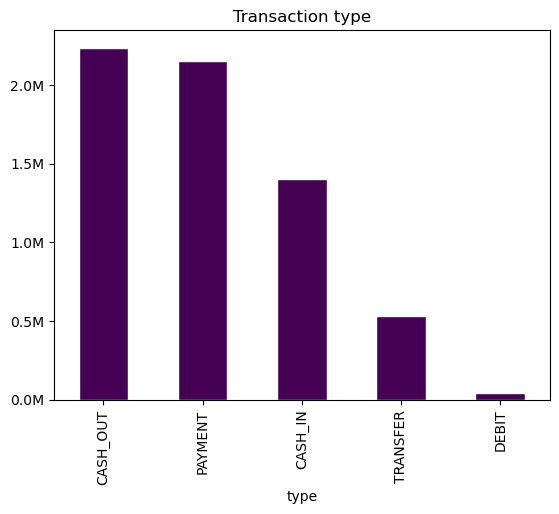

In [118]:
#plot transaction type 
ax = df_type.plot.bar(title= "Transaction type",cmap="viridis",edgecolor="white")
formatter = FuncFormatter(lambda x, pos: f'{x / 1e6:.1f}M')
ax.yaxis.set_major_formatter(formatter) 

* **Cash-out transactions are the most frequent, exceeding 2 million occurrences, with payments following closely in second place**

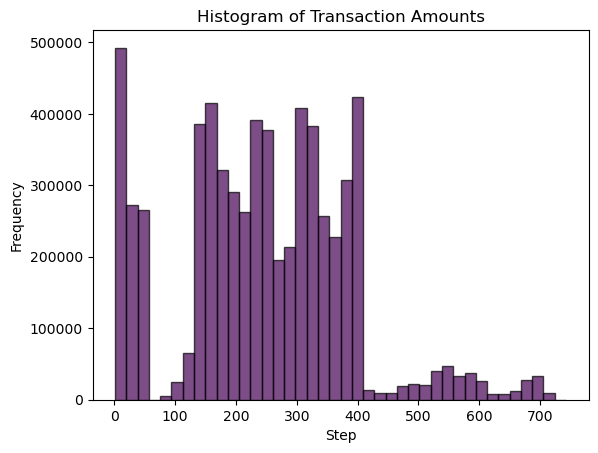

In [159]:
# plot a histogram of for step distribution
df["step"].plot(kind="hist", bins=40,cmap="viridis", edgecolor="black",alpha=0.7)
plt.xlabel("Step")
plt.ylabel("Frequency")
plt.title("Histogram of Transaction Amounts")
plt.show()



* **We observe an initial surge in transaction frequency from step 0-100. Subsequently, the transaction frequency stabilizes between steps 100-400, followed by a period of low activity after step 400**

In [139]:
#Find transactions which were flagged as Fraud using value_countsdf_ffraud = df.value_counts("isFlaggedFraud")
df_ffraud.to_frame() #add to dataframe

,count
isFlaggedFraud,
0,6362604
1,16


* **Only 16 transactions are flagged as fraud within the dataset. Let's see how flagged fraud compares to actual Fraudulate transactions**

In [10]:
# calculate the Value_counts  for isFraud 
df_fraud = df.value_counts("isFraud")
df_fraud.to_frame()

,count
isFraud,
0,6354407
1,8213


<Axes: title={'center': 'Fraud VS.Not_Fraud'}, xlabel='isFraud'>

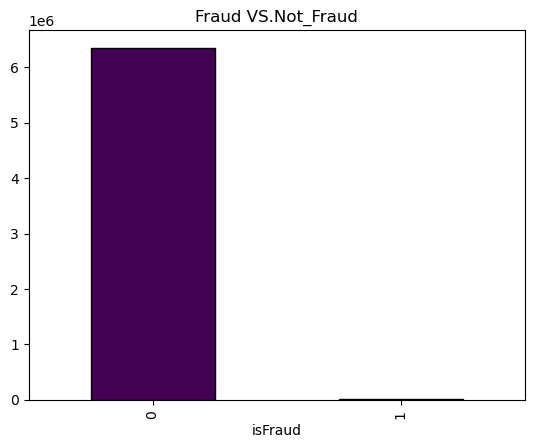

In [160]:
#plot bargraph showing what is marked fraud and what is not marked fraud
df_fraud.plot.bar(title= "Fraud VS.Not_Fraud",edgecolor="black",cmap="viridis")

* **While fraudulent transactions account for just 0.0129% of our total, we need to examine their distribution by transaction type**

In [163]:
#Turn isFraud and into boolean index 1 for isfraud 0 for is not fraud 
Fraud_df= df[df["isFraud"] == 1]
NotFraud_df= df[df["isFraud"] == 0]

Fraud_type= Fraud_df.value_counts("type")
Fraud_type.to_frame()

,count
type,
CASH_OUT,4116
TRANSFER,4097


<Axes: title={'center': 'Fraudulent transaction by type'}, xlabel='type'>

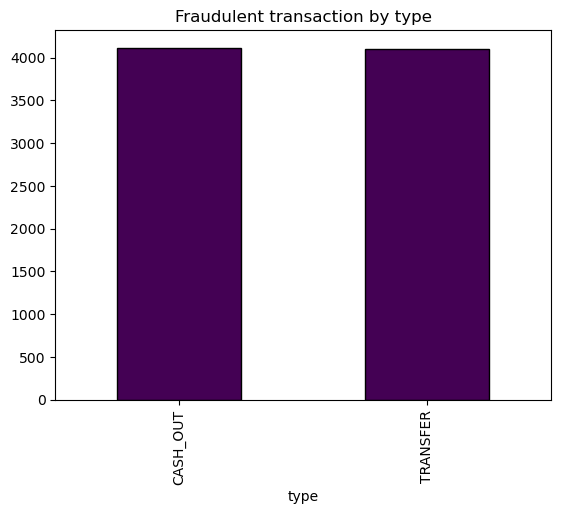

In [161]:
# distrubtion of actual Fraudulent transaction
Fraud_df["type"].value_counts().plot.bar( title = "Fraudulent transaction by type",cmap= "viridis",edgecolor="black")

* **Fraudulent activity is heavily concentrated within the "CASH_OUT" and "TRANSFER" transaction types.**

* **This finding indicates that these two transaction types ("CASH_OUT" and "TRANSFER") should be prioritized for fraud detection and prevention measures.**

In [47]:
#show trancation that are fraud 
Fraud_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


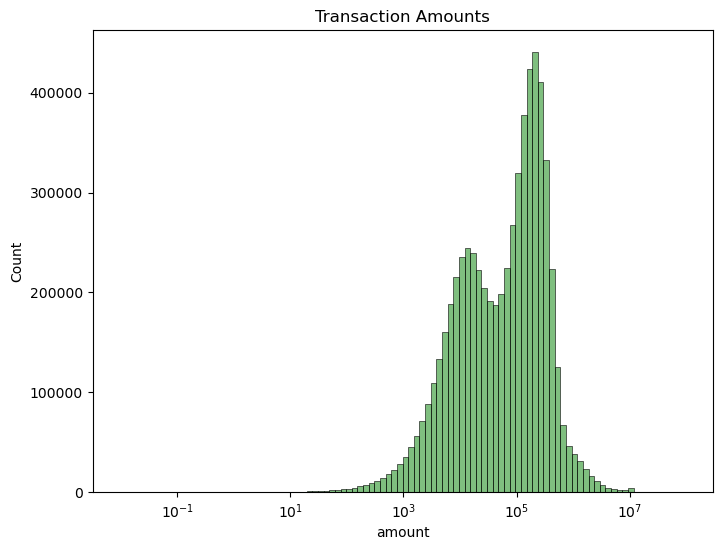

In [145]:
#Plot the distribution of transaction amount using a histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="amount",bins=100,color="green", kde=True, log_scale=True)
plt.title("Transaction Amounts", loc= "center")
plt.show()


* **When observing the histogram we can see it is right skew, this tells us there are some unusally high values.**

* **The graph exhibits two distinct modes, with a primary concentration between 10^5 and 10^6, and a secondary, less prominent mode around 10^3. However, the distribution is right-skewed.**

* **The transaction amounts are heavily concentrated in the 10^5 to 10^6 range, with a significant number of transactions also around 10^3**



# Bivariate Analysis

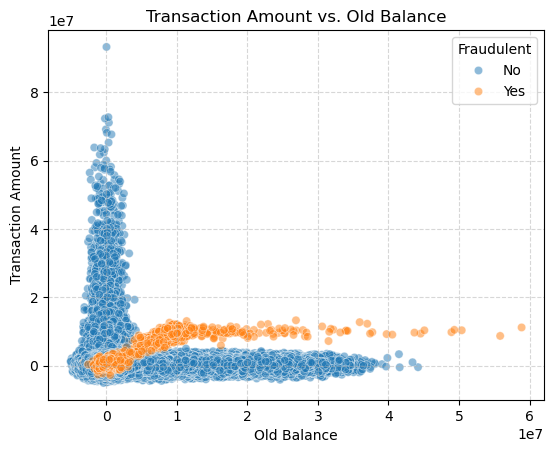

In [152]:
# Copy df and label as df_jiffer
df_jitter = df.copy()
# Add jitter to oldbalanceOrg and amount
# Adjust this value to control the amount of jitter
jitter_amount = 1e6 
df_jitter["oldbalanceOrg"] = df_jitter["oldbalanceOrg"] + np.random.normal(0, jitter_amount, df_jitter.shape[0])
df_jitter["amount"] = df_jitter["amount"] + np.random.normal(0, jitter_amount, df_jitter.shape[0])

# Plot the scatter plot with jittered data
sns.scatterplot(data=df_jitter, x="oldbalanceOrg", y="amount", hue="isFraud", alpha=0.5)

plt.title("Transaction Amount vs. Old Balance")
plt.xlabel("Old Balance")
plt.ylabel("Transaction Amount")

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ["No", "Yes"], title="Fraudulent")

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


* **There are many non-fraudulent transactions that have a very high old balance, but a very low transaction amount.**

* **There's a noticeable separation between the fraudulent and non-fraudulent transaction patterns. This suggests that "Old Balance" and "Transaction Amount"are potential features that can help distinguish fraudulent activity**

* **The linear pattern in fraudulent transactions suggests that certain thresholds or ranges of "Old Balance" and "Transaction Amount" might be inductor of fraud**

# Multivariate Analysis 

<Axes: >

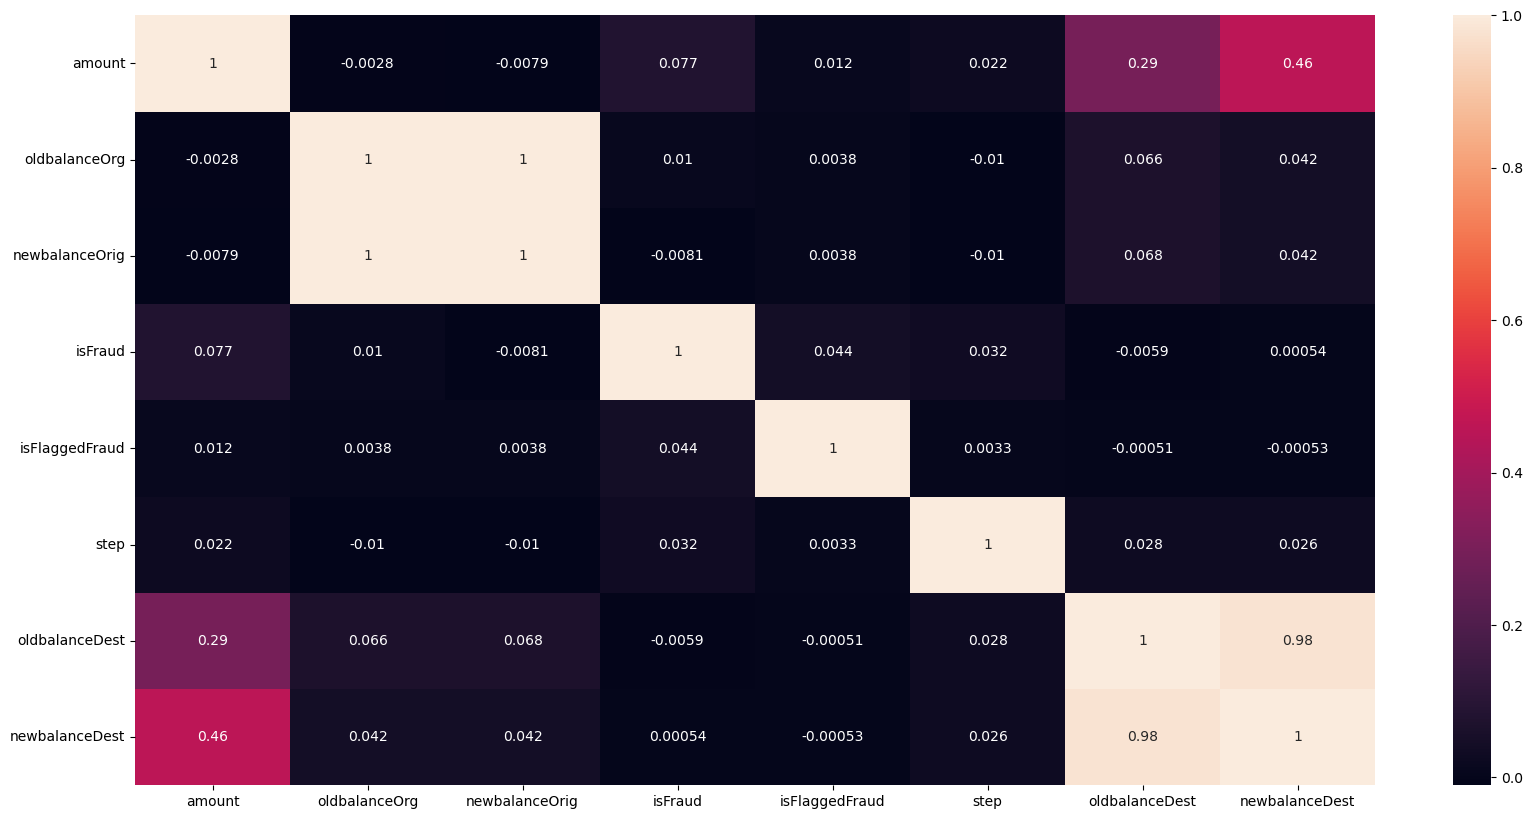

In [137]:

# Create new DataFrame without string variables 


heat_dict = pd.DataFrame({"amount":df["amount"],
                "oldbalanceOrg":df["oldbalanceOrg"],
                "newbalanceOrig":df["newbalanceOrig"],
                "isFraud":df["isFraud"],
                "isFlaggedFraud":df["isFlaggedFraud"],
                "step":df["step"],
                "oldbalanceDest":df["oldbalanceDest"],
                "newbalanceDest":df["newbalanceDest"]

    
}) 
#use heat_dict to create heatmap
plt.figure(figsize=(20,10))
sns.heatmap(heat_dict.corr(), annot=True)

# Strong Positive Correlation
* **The correlation  between oldbalanceDest and newbalanceDest coefficient is 0.98, which is very close to 1.**

* **This indicates a strong positive linear relationship. As the old balance of the destination account increases, the new balance of the destination account also increases proportionally.**

# Moderate Positive Correlation Between 
* **The correlation between amount and oldbalanceDest/newbalanceDest coefficients are 0.29 and 0.46 respectively.**

* **This suggests a moderate positive relationship. Higher transaction amounts are associated with higher old and new balances of the destination account**



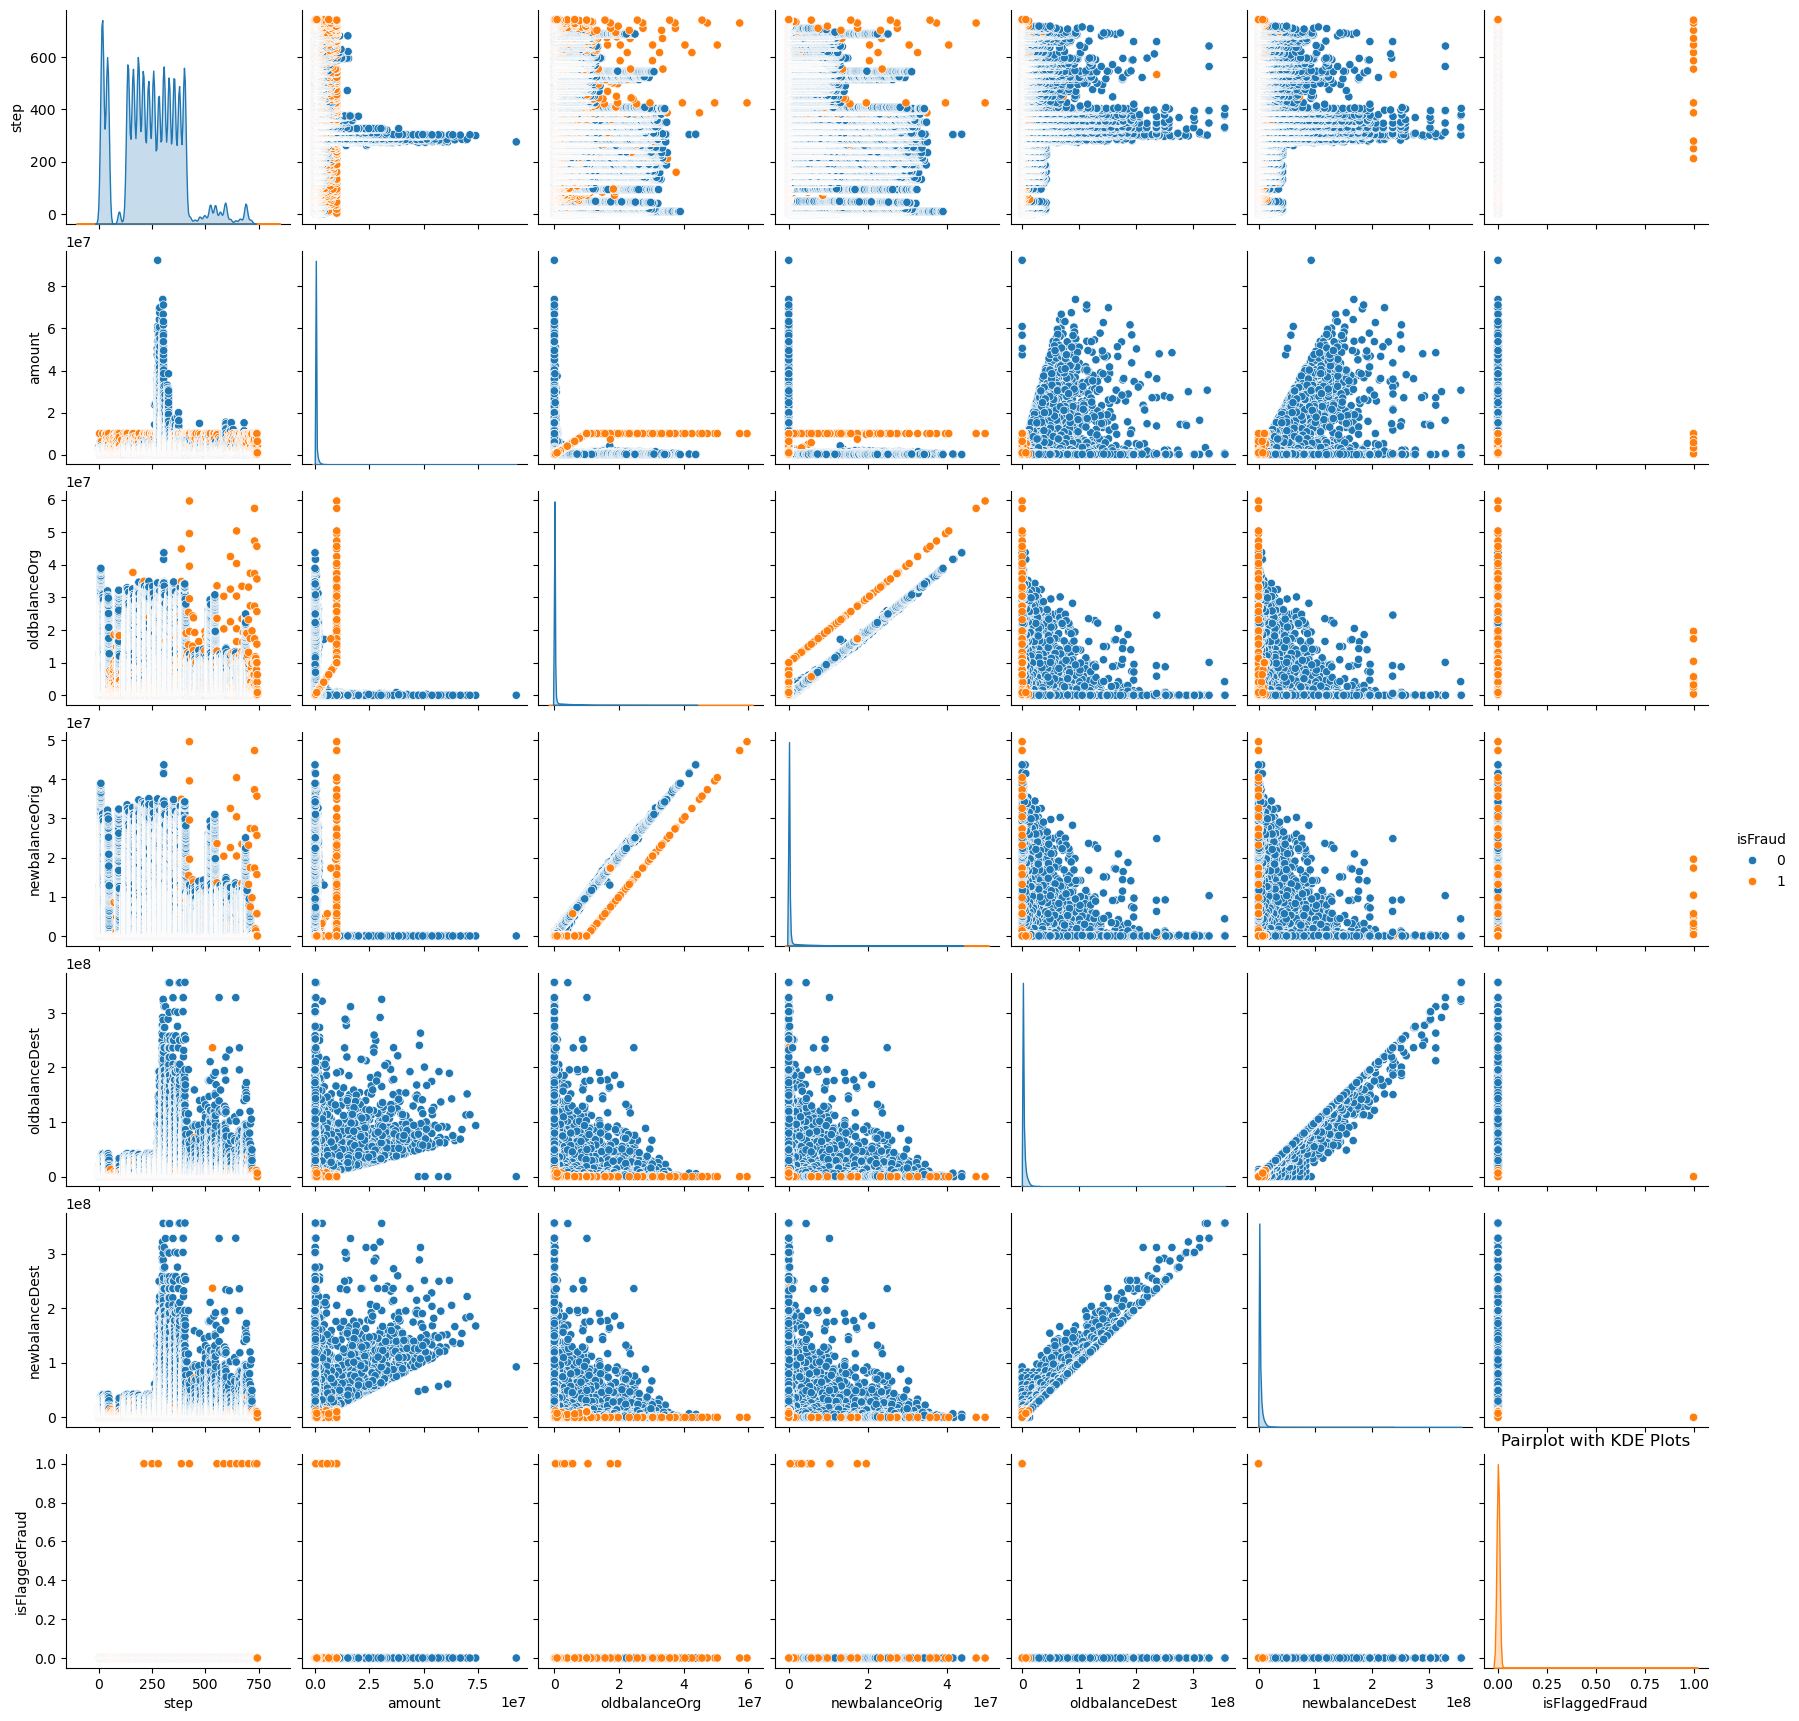

In [80]:
# create pairplot to observe all relationships across colums
sns.pairplot(data=df, hue="isFraud", diag_kind='kde')
plt.title('Pairplot with KDE Plots')
plt.show()

# Pairplot Major Observation

* **Step distribution is highly skewed, showing a concentration of transactions at the beginning and then tapering off.**

* **Step shows little to no clear linear correlation with any other variable, as seen in the scattered patterns in the scatter plots**

* **Fraudulent transactions (isFraud)" show distinct patterns in relation to "oldbalanceDest", "newbalanceDest", and "amount".They tend to form a line, especially when plotted against the destination balances**

* **isFlaggedFraud is very rare, and has very little to no corelation with the other variables.**


